In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Cleaned_Pokemon_Data.csv")
df.head()

,Unnamed: 0,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,0,318,45,49,49,65,65,45,Grass,Poison
1,1,405,60,62,63,80,80,60,Grass,Poison
2,2,525,80,82,83,100,100,80,Grass,Poison
3,3,625,80,100,123,122,120,80,Grass,Poison
4,4,309,39,52,43,60,50,65,Fire,Fire


In [4]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [5]:
df

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1,Type 2
0,318,45,49,49,65,65,45,Grass,Poison
1,405,60,62,63,80,80,60,Grass,Poison
2,525,80,82,83,100,100,80,Grass,Poison
3,625,80,100,123,122,120,80,Grass,Poison
4,309,39,52,43,60,50,65,Fire,Fire
...,...,...,...,...,...,...,...,...,...
1210,590,90,72,100,122,108,98,Steel,Psychic
1211,450,90,65,85,65,85,60,Normal,Normal
1212,600,95,95,110,105,110,85,Normal,Normal
1213,700,160,105,110,130,110,85,Normal,Normal


In [6]:
# describing the data 
df.describe() 


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


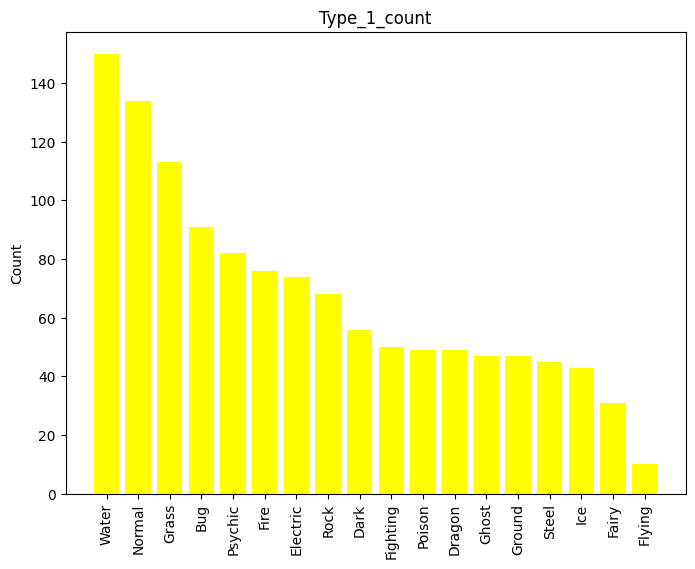

In [7]:
Type_1_count = df['Type 1'].value_counts() 
plt.figure(figsize=(8, 6)) 
plt.bar(Type_1_count.index, Type_1_count, color='yellow')
plt.xticks(rotation = 90) 
plt.title('Type_1_count') 
plt.ylabel('Count') 
plt.show()

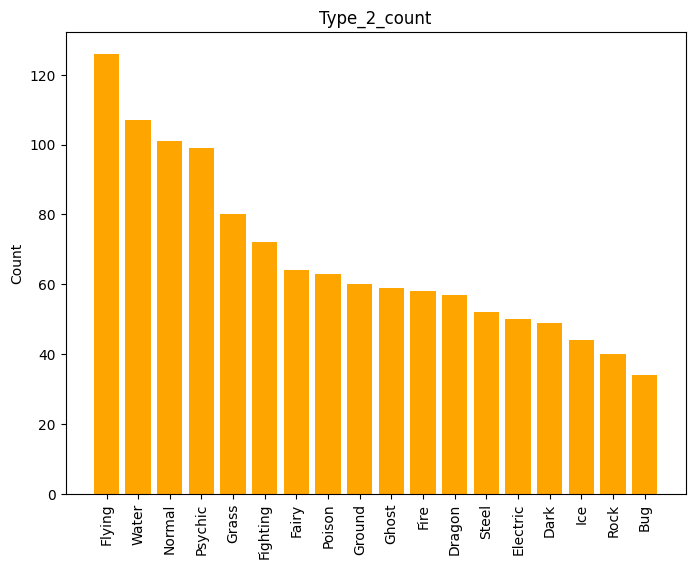

In [12]:
Type_2_count = df['Type 2'].value_counts() 
plt.figure(figsize=(8, 6)) 
plt.bar(Type_2_count.index, Type_2_count, color='orange')
plt.xticks(rotation = 90) 
plt.title('Type_2_count') 
plt.ylabel('Count') 
plt.show()

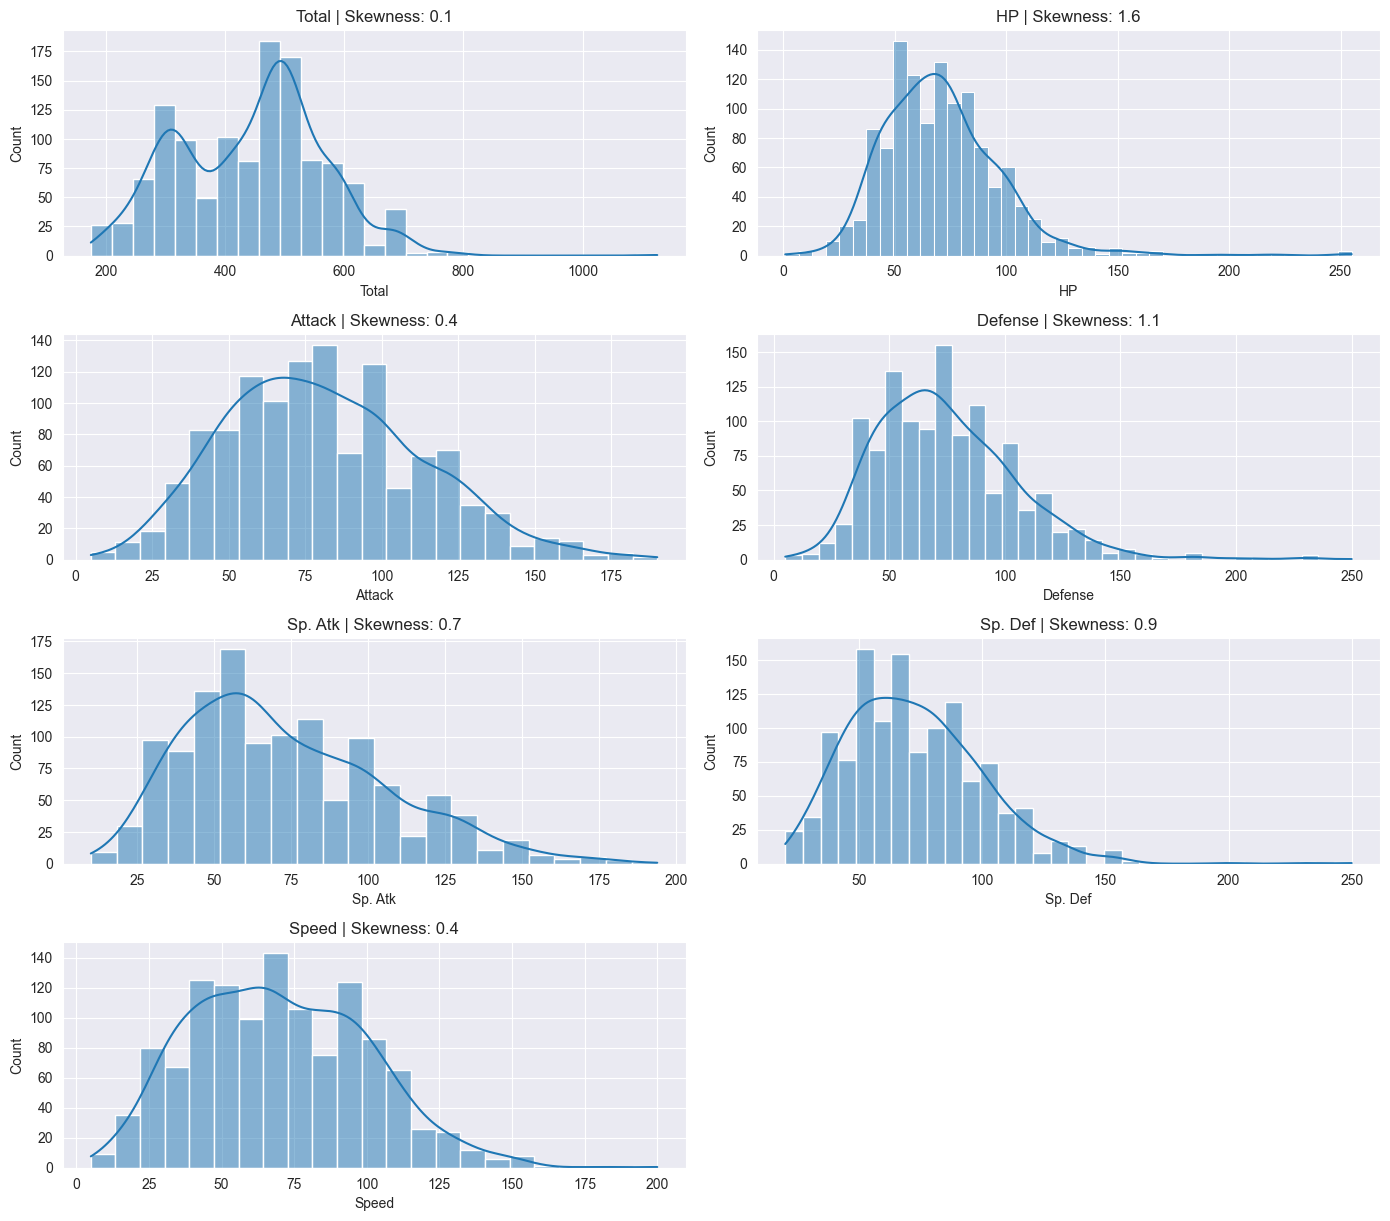

In [8]:
sns.set_style("darkgrid") 
numerical_columns = df.select_dtypes(include=["int64"]).columns 
plt.figure(figsize=(14, len(numerical_columns) * 3)) 
for idx, feature in enumerate(numerical_columns, 1): 
    plt.subplot(len(numerical_columns), 2, idx) 
    sns.histplot(df[feature], kde=True) 
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 1)}") 

plt.tight_layout() 
plt.show() 

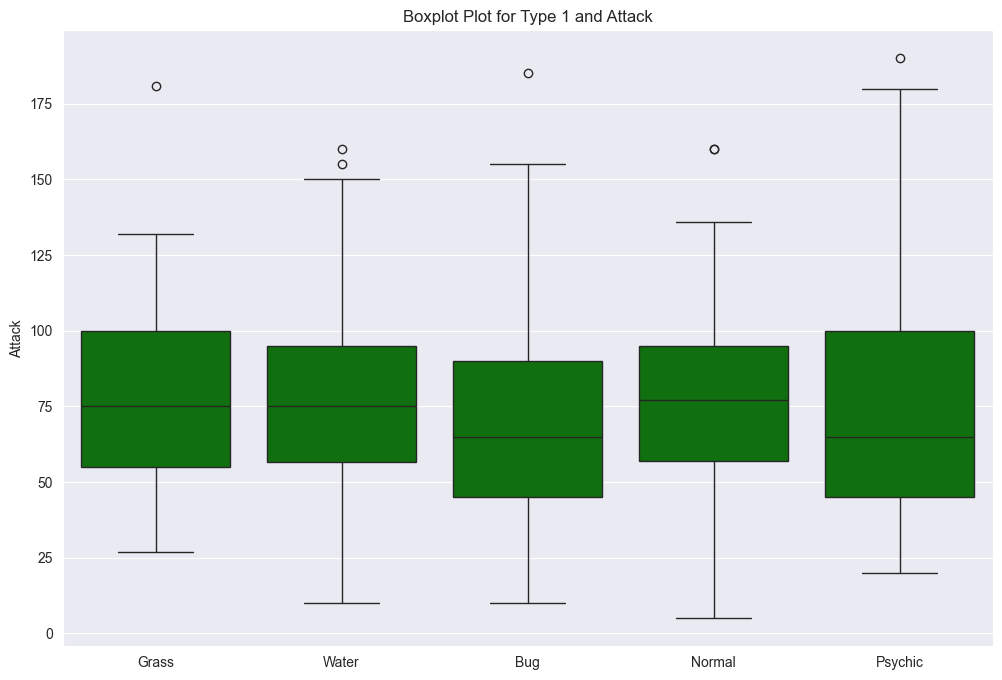

In [9]:
top_types = df['Type 1'].value_counts().head(5).index
filtered_df = df[df['Type 1'].isin(top_types)]

df['Type 1'] = df['Type 1'].astype(str) 
plt.figure(figsize=(12, 8)) 
sns.boxplot(x="Type 1", y="Attack", data=filtered_df , color= 'green') 
plt.title('Boxplot Plot for Type 1 and Attack') 
plt.xlabel('')
plt.ylabel('Attack') 
plt.show() 

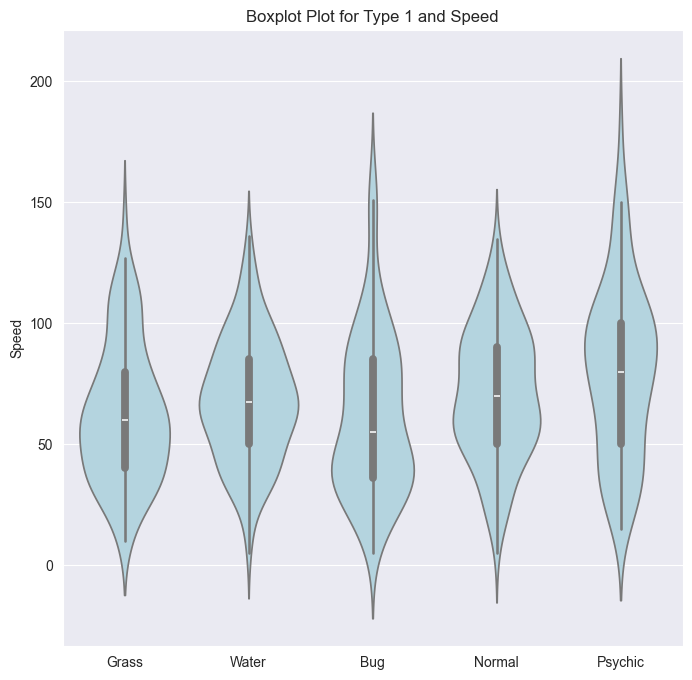

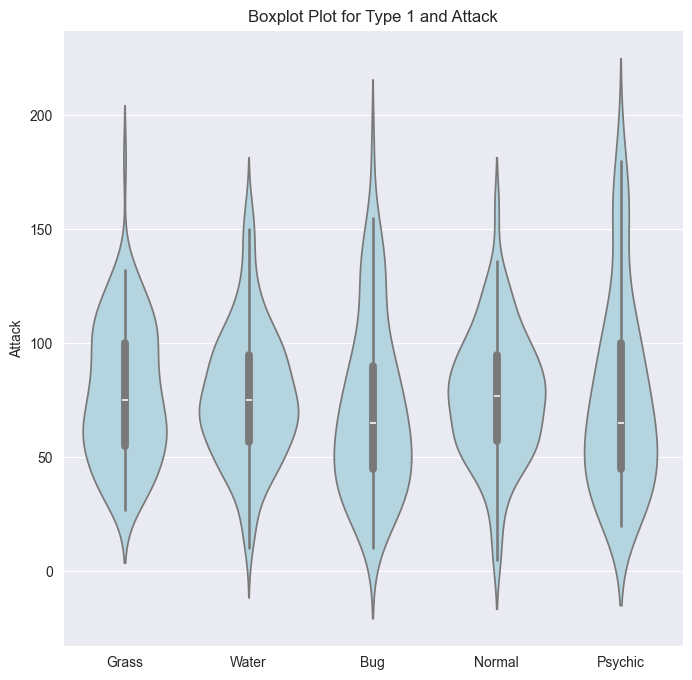

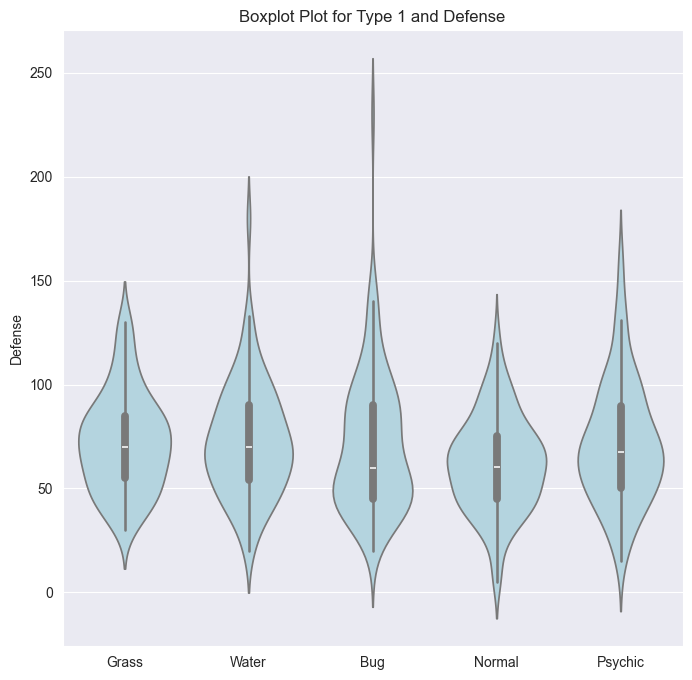

In [56]:
df['Type 1'] = df['Type 1'].astype(str) 
features = ['Speed',"Attack" , 'Defense']
for feature in features:
    plt.figure(figsize=(8 , 8)) 
    sns.violinplot(x="Type 1", y=feature, data=filtered_df , color='lightblue') 
    plt.title(f'Boxplot Plot for Type 1 and {feature}') 
    plt.xlabel('')
    plt.ylabel(f'{feature}') 
    plt.show() 

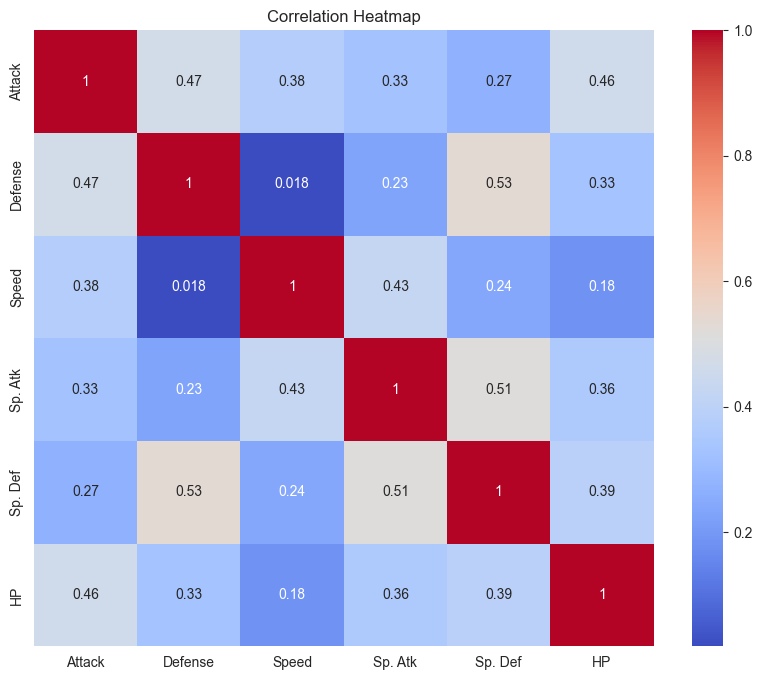

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Attack', 'Defense', 'Speed' , 'Sp. Atk' , 'Sp. Def' , 'HP']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [62]:
features = ['Attack', 'Speed', 'Defense']
for i in features:
    mean = df[i].mean()
    std_dev = df[i].std()
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev
    outliers = df[(df[i] > upper_limit) | (df[i] < lower_limit)]

    print(f"Outliers in {i}:")
    print(outliers)
    print()

Outliers in Attack:
     Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed   Type 1    Type 2
201    780  106     190      100      154      100    130  Psychic  Fighting
274    600   80     185      115       40      105     75      Bug  Fighting
473    770  100     180      160      150       90     90   Ground      Fire
475    780  105     180      100      180      100    115   Dragon    Flying
478    600   50     180       20      180       20    150  Psychic   Psychic
956    570   59     181      131       59       31    109    Grass     Steel

Outliers in Speed:
      Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed    Type 1    Type 2
480     600  50      95       90       95       90    180   Psychic   Psychic
1063    580  80     100       50      100       50    200  Electric  Electric

Outliers in Defense:
      Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Type 1   Type 2
108     590   95      75      180      130       80     30   Water  Psychic
123     525  